<a href="https://colab.research.google.com/github/lauxpaux/HappinessResearch/blob/main/HappinessDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this project, I will be using the World Happiness Report 2022 dataset collected from kaggle found [here](https://www.kaggle.com/datasets/mathurinache/world-happiness-report) to showcase determinants of happiness around the globe. 

As a starting point, I'm going to list my biased assumptions prior to looking at the data based on the measured variables.

Personal (biased) assumptions:
1) Economy is a strong determinant of happiness
2) Freedom is a close second determinant of happiness
3) Social support is a strong determinant of happiness.

Curiorisites before primal data investigation:
1) Is there correlation between health and happiness? Does life expectancy capture chronic health illnesses and injury? Does one country have more chronic health illnesses than the other? What about injury? What is the correlation between health/injury/chronic illnesses and government trust/corruption?  What is the correlation between family and life expectancy? What is the correlation between family and economy? How does generosity affect health? What is the strongest determinants of happiness and the least? 

Listing assumptions after investigating the data, particularly the top 3 happiest nations and top 3 unhappiest nations.

1) The firs 3 nations do not have the highest GDP and the unhappiest nations do not have the lowest GDP.
2) The top nations report some of the highest satisfaction as far as freedom, the unhappiest nations report considerably lower satisfaction in freedom, with Afghanistan (the unhappiest) having the lowest scores.

p.s. A logical explanation of Afganistan's unhappiness could be war.

3) The top happiest nations report some of the highest social support however the unhappiest nations do not report the lowest scores in social support.  What exactly does social support mean? 

Let's begin our investigation starting with loading the libraries we need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


Let's investigate further, starting with loading the data


In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Happiness Dataset/2022.csv')
#looking into the top 5 happinest nations
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [3]:
#looking at the 5 unhappiest nations 
df.tail()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Investigating the datatypes, columns names, and shape of the data

In [4]:
df.info()
print()
print('Shape:', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

Let's take a deeper look at the data by looking at the mean, standard deviation, minimum, maximum and percentiles

In [5]:
df.describe()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,147.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,74.000000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.579338,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.500000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,74.000000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,110.500000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,147.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


In [6]:
df.nunique(axis=0)

RANK                                          147
Country                                       147
Happiness score                               141
Whisker-high                                  144
Whisker-low                                   141
Dystopia (1.83) + residual                    138
Explained by: GDP per capita                  141
Explained by: Social support                  133
Explained by: Healthy life expectancy         134
Explained by: Freedom to make life choices    128
Explained by: Generosity                      116
Explained by: Perceptions of corruption       116
dtype: int64

Getting rid of redundant variable:

In [7]:
df2 = df.copy().drop(['RANK', 'Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual'], axis=1)
df2

,Country,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...
142,Rwanda*,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034
145,Afghanistan,2.404,0.758,0.000,0.289,0.000,0.089,0.005


Getting rid of null values, this means the column 'xx' with NaN values will be deleted and our row count will drom from 147 to 146

In [8]:
df2 = df2.dropna(axis=0)

In [9]:
df2

,Country,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...
141,Botswana*,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,Rwanda*,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034


Next, let's create a correlation matrix to see the correlation between all of the variables

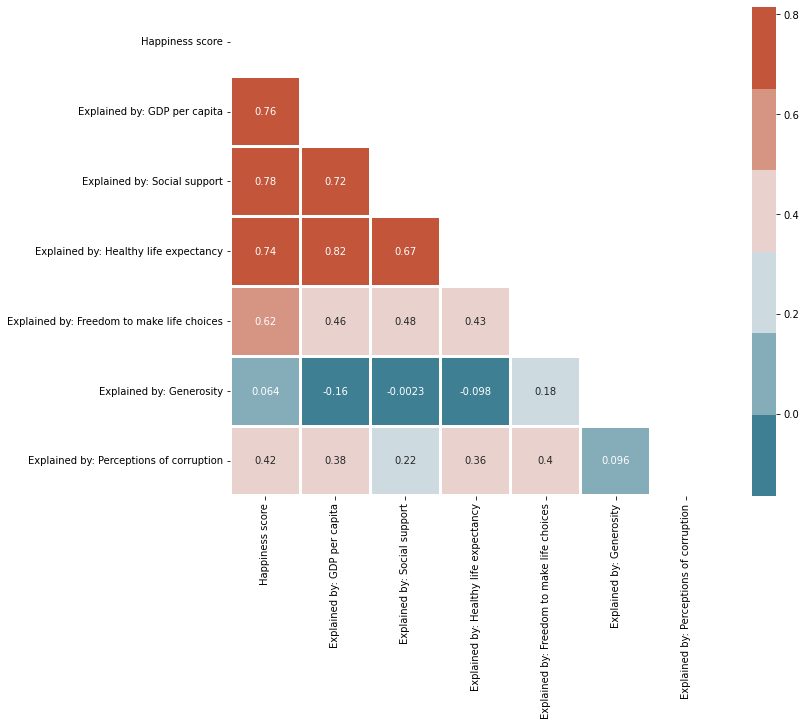

In [30]:
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20), mask=mask, cbar=True, linecolor='white',  linewidths=2)